In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data.
tx_df = pd.read_csv('../data/texas_combined_cleaned_with_tests_obesity.csv')

In [3]:
tx_df.head(3)

,county_name,total_tests,obes_percent,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,anderson,29485,0.373,2922.0,39,0.013347,57863,10142,34312,12127,...,1432,422,240,43355,55852,16868,26621,36865,26890,54.452632
1,andrews,1943,0.313,567.0,10,0.017637,17818,9979,7215,321,...,1214,398,352,74233,94962,31190,40478,72970,35194,11.872960
2,angelina,20269,0.396,2277.0,90,0.039526,87607,19174,53216,12834,...,3257,985,639,47714,61152,22322,27411,41488,32622,109.813207


In [4]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('race_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['race_pop']
        elif column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']            
        elif column.startswith('health_ins_noninst_pop_cov'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['health_ins_noninst_pop']
        elif column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [5]:
to_percentage(tx_df)

In [6]:
tx_df['deaths_per_100_cases'] = tx_df['death_rate'] * 100

In [7]:
tx_df['fatalities_per_100_people'] = (tx_df['total_fatalities']/tx_df['race_pop']) * 100

In [8]:
tx_df['tests_per_100_people'] = (tx_df['total_tests']/tx_df['race_pop']) * 100

In [9]:
tx_df['cases_per_100_people'] = (tx_df['total_cases']/tx_df['race_pop']) * 100

In [10]:
tx_df = tx_df.set_index('county_name')

In [11]:
list(tx_df.columns)

['total_tests',
 'obes_percent',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop

In [12]:
# Define a custom function to help subplot histograms.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, 
                       list_of_ylabels, figsize, bins, ncols, hspace):
    plt.style.use('seaborn-whitegrid')
    nrows = int(np.ceil(len(list_of_columns)/ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):

        ax[i].hist(dataframe[column], bins=bins)
        # Set title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=14)
        
        # Set xlabel for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)

        # Set ylabel for each subplot
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=12)

        plt.subplots_adjust(hspace=hspace);

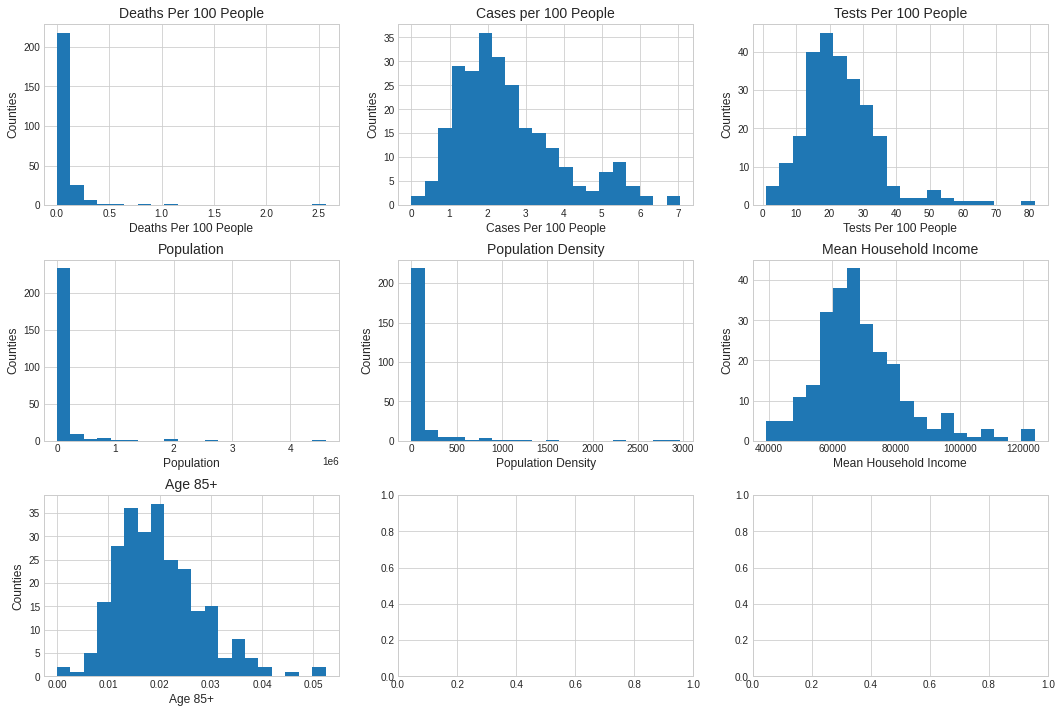

In [13]:
subplot_histograms(
    tx_df,
    ['fatalities_per_100_people', 'cases_per_100_people', 'tests_per_100_people', 'race_pop', 'pop_density', 'inc_mean_hhld_inc_dol', 'percent_sex_age_pop_85_and_over'],
    ['Deaths Per 100 People', 'Cases per 100 People', 'Tests Per 100 People', 'Population', 'Population Density', 'Mean Household Income', 'Age 85+'],
    ['Deaths Per 100 People', 'Cases Per 100 People', 'Tests Per 100 People', 'Population', 'Population Density', 'Mean Household Income', 'Age 85+'],
    ['Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties', 'Counties'],
    figsize=(18,12),
    bins=20,
    ncols=3,
    hspace=.3
)

In [14]:
tx_df[tx_df['race_pop'] > 1_000_000]

,total_tests,obes_percent,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_inc_hhlds_35_000_to_49_999,percent_inc_hhlds_50_000_to_74_999,percent_inc_hhlds_75_000_to_99_999,percent_inc_hhlds_100_000_to_149_999,percent_inc_hhlds_150_000_to_199_999,percent_inc_hhlds_200_000_or_more,deaths_per_100_cases,fatalities_per_100_people,tests_per_100_people,cases_per_100_people
county_name,,,,,,,,,,,,,,,,,,,,,
bexar,534225,0.297,51876.0,1386,0.026718,1925865,1155505,539435,136411,2863,...,0.132996,0.187086,0.125117,0.137593,0.049433,0.050500,2.671756,0.071968,27.739483,2.693647
dallas,893618,0.305,90790.0,1211,0.013338,2586552,1033000,765816,572790,5243,...,0.139553,0.186472,0.118822,0.130572,0.054562,0.069630,1.333847,0.046819,34.548619,3.510078
harris,1509805,0.299,155192.0,2759,0.017778,4602523,1958963,1384032,855008,8147,...,0.127154,0.175142,0.116958,0.141795,0.062273,0.083788,1.777798,0.059945,32.803856,3.371890
tarrant,511902,0.306,54727.0,801,0.014636,2019977,576242,958302,319829,5797,...,0.123775,0.188708,0.133555,0.158744,0.068547,0.072930,1.463629,0.039654,25.341972,2.709288
travis,331758,0.231,31159.0,439,0.014089,1203166,407676,590373,94922,1963,...,0.115214,0.175742,0.122807,0.167860,0.077126,0.110981,1.408903,0.036487,27.573751,2.589751


In [15]:
tx_df[tx_df['deaths_per_100_cases'] > 15]

,total_tests,obes_percent,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_inc_hhlds_35_000_to_49_999,percent_inc_hhlds_50_000_to_74_999,percent_inc_hhlds_75_000_to_99_999,percent_inc_hhlds_100_000_to_149_999,percent_inc_hhlds_150_000_to_199_999,percent_inc_hhlds_200_000_or_more,deaths_per_100_cases,fatalities_per_100_people,tests_per_100_people,cases_per_100_people
county_name,,,,,,,,,,,,,,,,,,,,,
dewitt,4374,0.255,1072.0,166,0.154851,20435,7132,11271,1865,7,...,0.124859,0.169159,0.125705,0.124859,0.034424,0.071812,15.485075,0.812332,21.404453,5.245902
delta,762,0.292,32.0,25,0.781250,5215,380,4232,391,16,...,0.143424,0.147891,0.139454,0.113648,0.042184,0.030769,78.125000,0.479386,14.611697,0.613615
kenedy,86,0.220,7.0,2,0.285714,595,522,72,0,0,...,0.339713,0.076555,0.110048,0.038278,0.000000,0.000000,28.571429,0.336134,14.453782,1.176471
marion,983,0.446,168.0,53,0.315476,10083,406,7142,2361,43,...,0.175151,0.123795,0.089258,0.062570,0.028706,0.050011,31.547619,0.525637,9.749083,1.666171
martin,649,0.307,86.0,144,1.674419,5614,2574,2978,48,8,...,0.140836,0.143296,0.131611,0.133456,0.089791,0.111931,167.441860,2.565016,11.560385,1.531885
mcmullen,151,0.241,24.0,7,0.291667,662,332,326,0,4,...,0.188341,0.201794,0.116592,0.103139,0.071749,0.112108,29.166667,1.057402,22.809668,3.625378


In [16]:
tx_df = tx_df.drop(tx_df[tx_df['deaths_per_100_cases'] > 15].index)

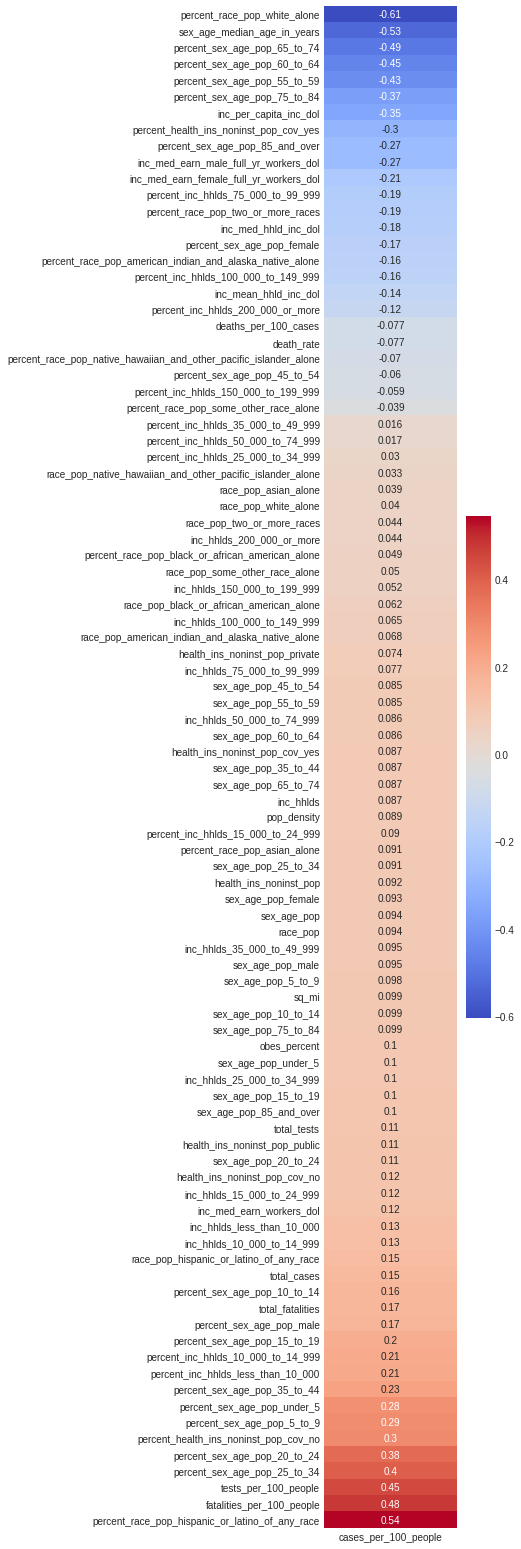

In [17]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = tx_df.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-1], annot=True, cmap = 'coolwarm');

In [18]:
list(tx_df.columns)

['total_tests',
 'obes_percent',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop

In [19]:
X = tx_df[[
    'percent_race_pop_white_alone',
    'sex_age_median_age_in_years',
    'percent_sex_age_pop_65_to_74',
    'percent_sex_age_pop_60_to_64',
    'percent_sex_age_pop_55_to_59',
    'percent_sex_age_pop_75_to_84',
    'inc_per_capita_inc_dol',
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'tests_per_100_people',
    'percent_sex_age_pop_25_to_34',
    'percent_sex_age_pop_20_to_24',
    'percent_health_ins_noninst_pop_cov_no',
]]

y = tx_df['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [21]:
y_train.min()

0.43859649122807015

In [22]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [23]:
X_train.shape, y_test.shape

((186, 12), (62,))

In [24]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.35102975498771727

In [25]:
X = tx_df[[
    'percent_race_pop_white_alone',
    'sex_age_median_age_in_years',
    'percent_sex_age_pop_65_to_74',
    'percent_sex_age_pop_60_to_64',
    'percent_sex_age_pop_55_to_59',
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'tests_per_100_people',
    'percent_sex_age_pop_25_to_34',
]]

y = tx_df['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [27]:
y_train.min()

0.43859649122807015

In [28]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [29]:
X_train.shape, y_test.shape

((186, 8), (62,))

In [30]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.4101729100332433